In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import Raw Data
raw_charts = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1', comment=None)

raw_charts.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [23]:
print("Data Info:")
print(raw_charts.info())        # General info (data types, nulls)
print("\nData Description:")
print(raw_charts.describe())    # Descriptive statistics for numeric columns
print("\nMissing Values:")
print(raw_charts.isnull().sum())  # Check for missing values

# Unique Count of Categorical Columns
print("\nUnique Track Names:", raw_charts['track_name'].nunique())
print("Unique Artists:", raw_charts['artist(s)_name'].nunique())
print("Unique Key:", raw_charts['key'].nunique())
print("Unique Mode:", raw_charts['mode'].nunique())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key         

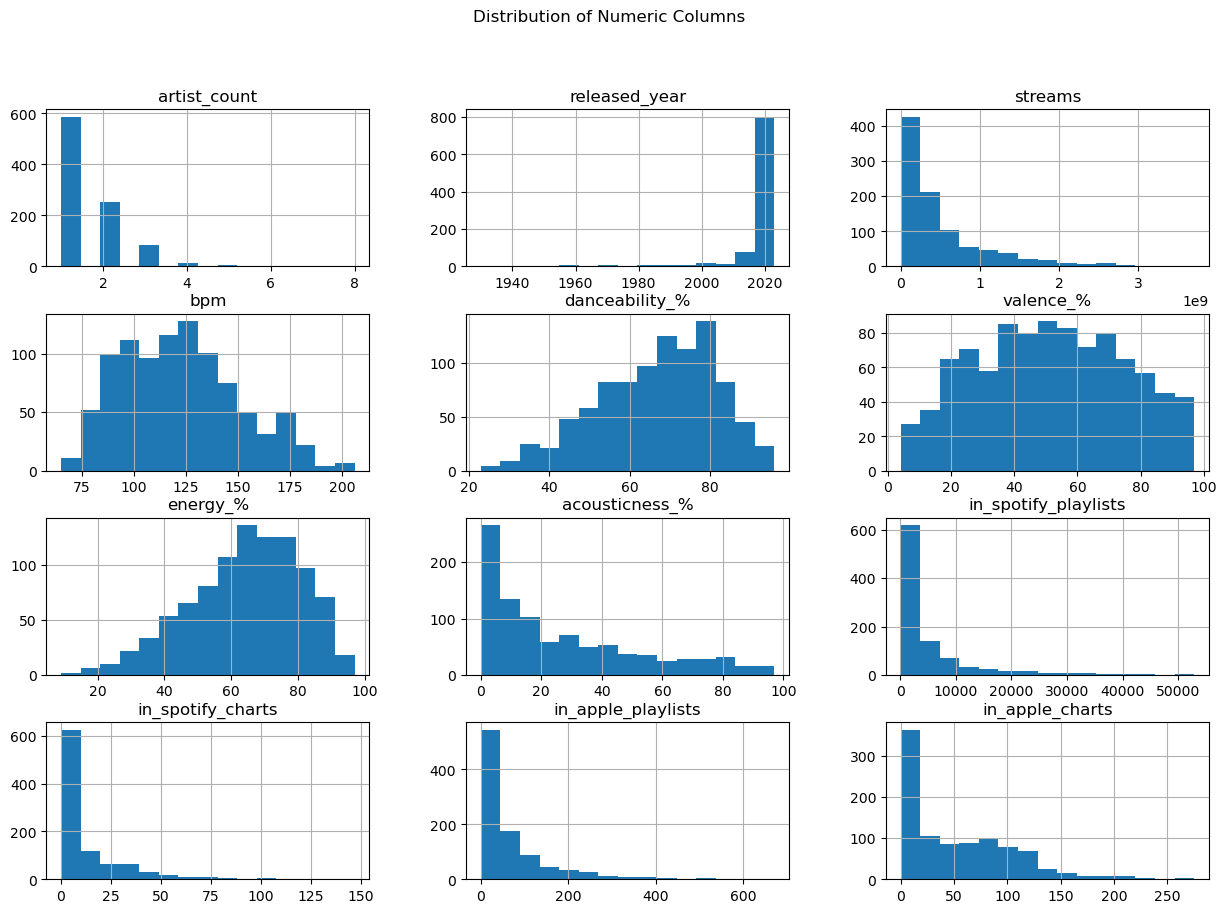

In [21]:
# Data Distribution of Numeric Columns
numeric_columns = [ "artist_count", "released_year", "streams",
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts'
]
raw_charts[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Columns')
plt.show()

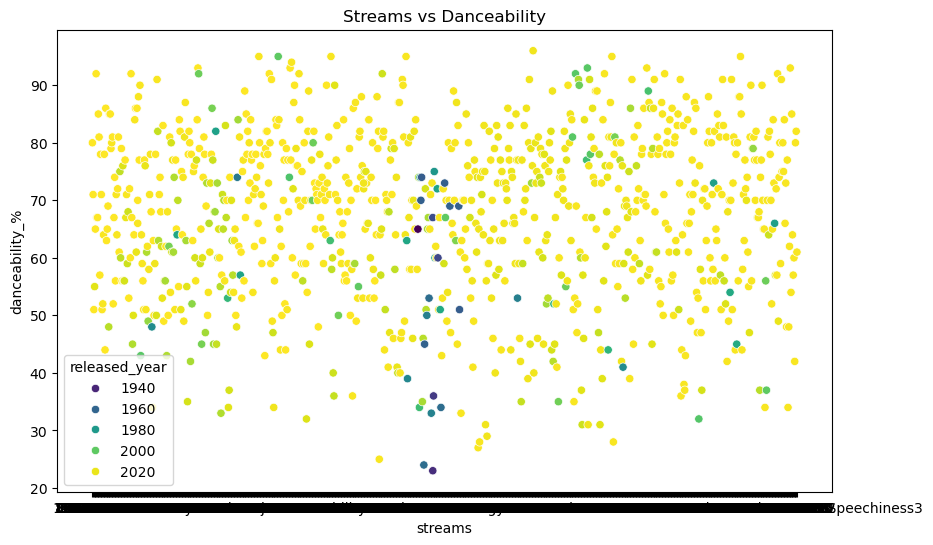

In [7]:
# Relationship between Streams and Other Features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_charts, x='streams', y='danceability_%', hue='released_year', palette='viridis')
plt.title('Streams vs Danceability')
plt.show()

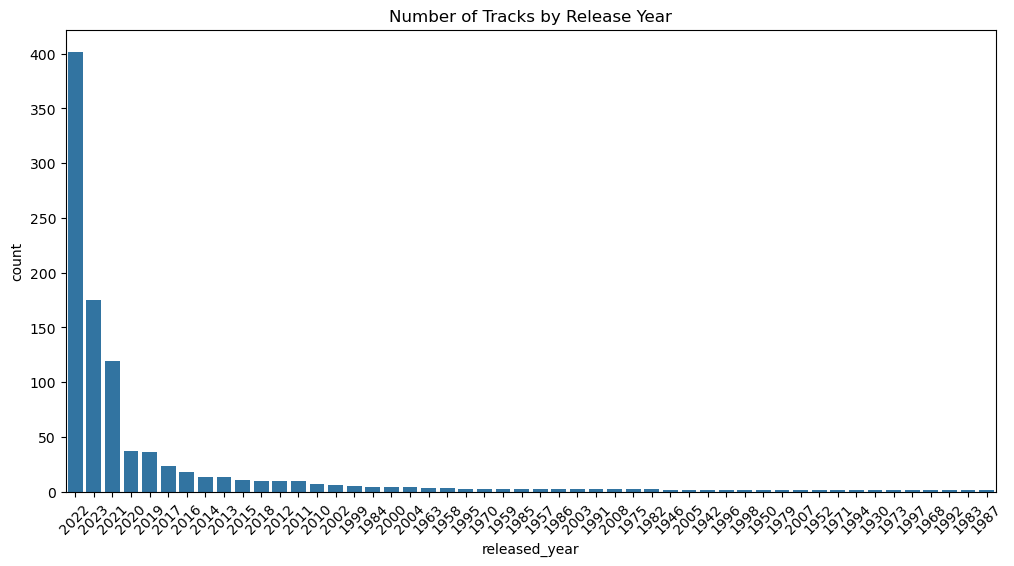

In [8]:
# Count of Tracks by Release Year
plt.figure(figsize=(12, 6))
sns.countplot(data=raw_charts, x='released_year', order=raw_charts['released_year'].value_counts().index)
plt.title('Number of Tracks by Release Year')
plt.xticks(rotation=45)
plt.show()

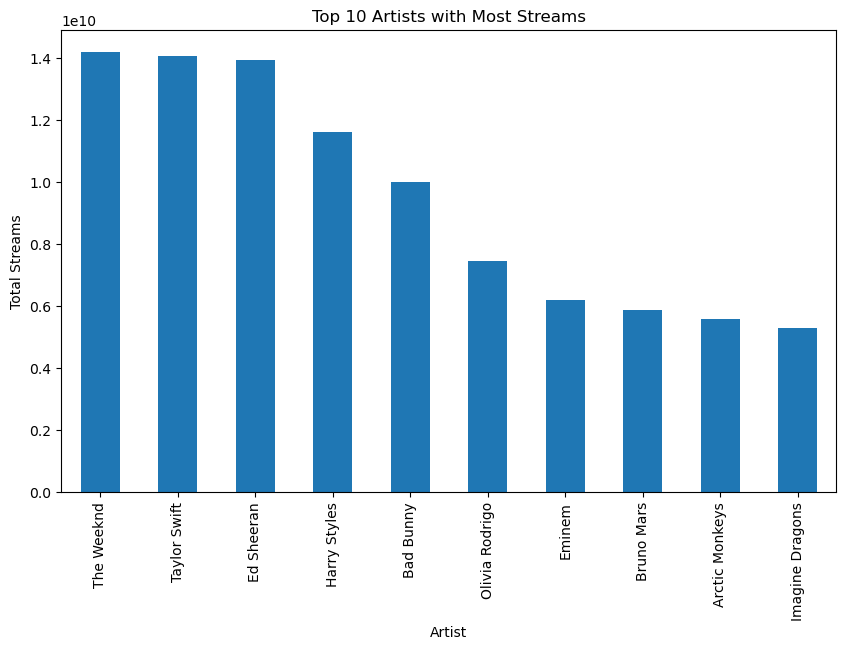

In [9]:
# Convert the 'streams' column to numeric, coercing errors
raw_charts['streams'] = pd.to_numeric(raw_charts['streams'], errors='coerce')

# Now, re-run the grouping and plotting
top_artists = raw_charts.groupby('artist(s)_name')['streams'].sum().nlargest(10)

# Plot the results
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists with Most Streams')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.show()


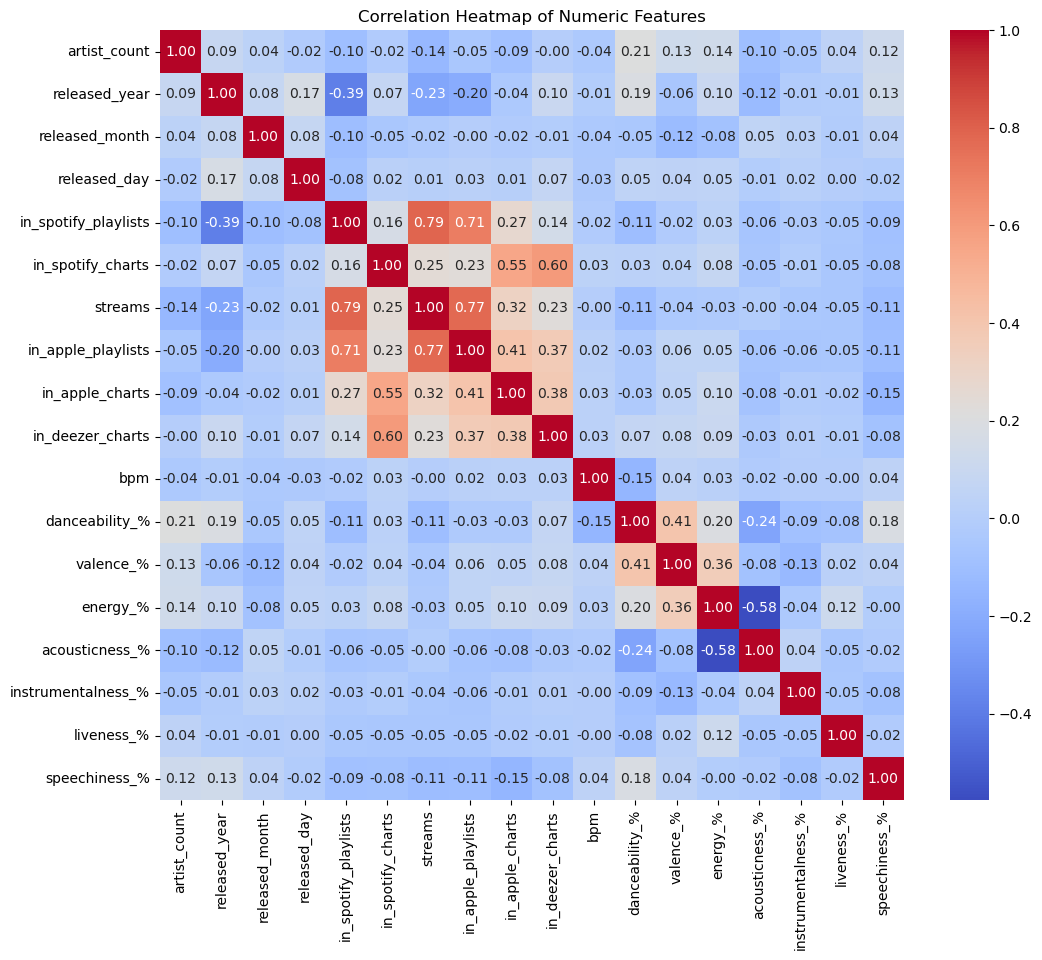

In [10]:
# Select only numeric columns for correlation
numeric_data = raw_charts.select_dtypes(include=[float, int])

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#Highest correlation between # of playlists and the # of streams

c:\Users\emmao\anaconda3\envs\dnn\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


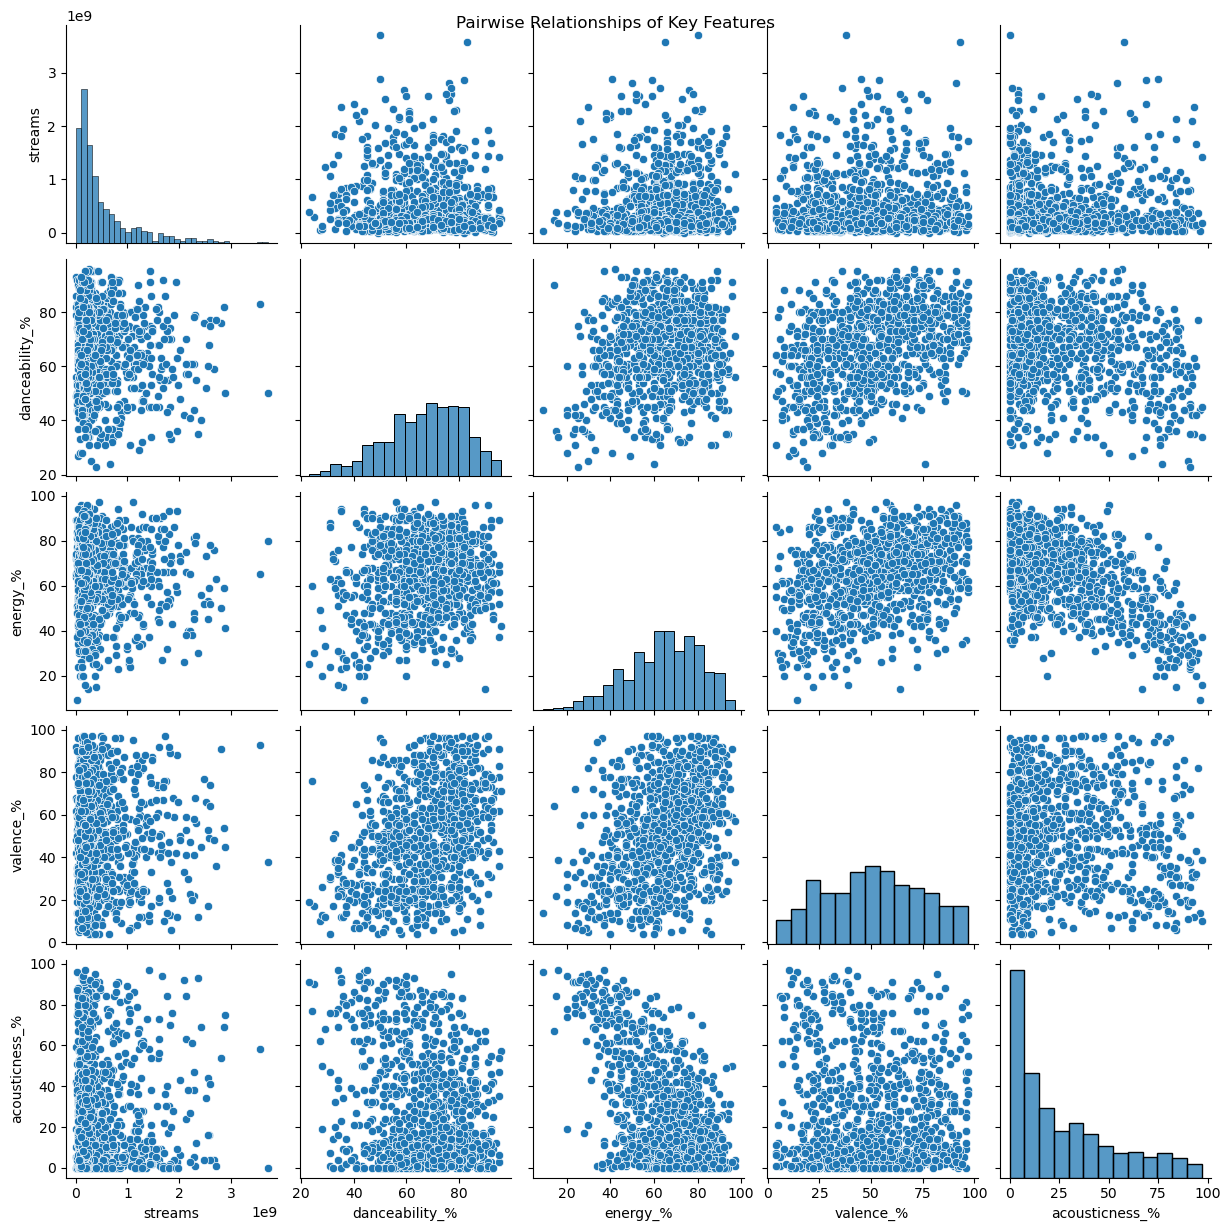

In [11]:
# Relationship between Key Features and Success (Streams)
sns.pairplot(raw_charts[['streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']])
plt.suptitle("Pairwise Relationships of Key Features")
plt.show()

In [22]:
import pandas as pd


numeric_summary = {}
for column in numeric_columns:
    series = raw_charts[column]  # Access the DataFrame's column directly
    numeric_summary[column] = {
        'sample_size': series.count(),
        'mean': series.mean(),
        'std_dev': series.std(),
        'min': series.min(),
        'q1': series.quantile(0.25),
        'median': series.median(),
        'q3': series.quantile(0.75),
        'max': series.max()
    }

numeric_summary

{'artist_count': {'sample_size': 953,
  'mean': 1.5561385099685205,
  'std_dev': 0.8930441928452764,
  'min': 1,
  'q1': 1.0,
  'median': 1.0,
  'q3': 2.0,
  'max': 8},
 'released_year': {'sample_size': 953,
  'mean': 2018.2381951731375,
  'std_dev': 11.116218075505918,
  'min': 1930,
  'q1': 2020.0,
  'median': 2022.0,
  'q3': 2022.0,
  'max': 2023},
 'streams': {'sample_size': 952,
  'mean': 514137424.93907565,
  'std_dev': 566856949.0388832,
  'min': 2762.0,
  'q1': 141636175.0,
  'median': 290530915.0,
  'q3': 673869022.0,
  'max': 3703895074.0},
 'bpm': {'sample_size': 953,
  'mean': 122.54039874081847,
  'std_dev': 28.057801508156196,
  'min': 65,
  'q1': 100.0,
  'median': 121.0,
  'q3': 140.0,
  'max': 206},
 'danceability_%': {'sample_size': 953,
  'mean': 66.96956977964324,
  'std_dev': 14.6306098744348,
  'min': 23,
  'q1': 57.0,
  'median': 69.0,
  'q3': 78.0,
  'max': 96},
 'valence_%': {'sample_size': 953,
  'mean': 51.43126967471144,
  'std_dev': 23.480631839891334,
  'm